In [1]:
import pandas as pd



In [65]:
df_walk_1 = pd.read_json("Gehen.14.05-2023-05-14_13-02-33.json")
df_bike_1 = pd.read_json("fahrrad_17.05-1-2023-05-17_17-48-35.json")
df_bus_1 = pd.read_json("Bus_24.05-1-2023-05-24_10-49-43.json")

In [13]:
df_walk_1.head()
df_walk_1.columns

Index(['sensor', 'time', 'seconds_elapsed', 'z', 'y', 'x', 'batteryLevel',
       'batteryState', 'lowPowerMode', 'brightness', 'lux', 'bearingAccuracy',
       'speedAccuracy', 'verticalAccuracy', 'horizontalAccuracy', 'speed',
       'bearing', 'altitude', 'longitude', 'latitude', 'version',
       'device name', 'recording time', 'platform', 'appVersion', 'device id',
       'sensors', 'sampleRateMs', 'qz', 'qy', 'qx', 'qw', 'roll', 'pitch',
       'yaw'],
      dtype='object')

In [38]:
df_bike_1.head()

,sensor,time,seconds_elapsed,z,y,x,altitude,speedAccuracy,bearingAccuracy,latitude,...,device id,sensors,sampleRateMs,yaw,qx,qz,roll,qw,qy,pitch
0,Accelerometer,1.684346e+18,0.045285,-0.232101,0.047749,-0.066060,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Accelerometer,1.684346e+18,0.055250,-0.136406,-0.037855,0.035941,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Accelerometer,1.684346e+18,0.065215,-0.033653,-0.093889,0.067097,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Accelerometer,1.684346e+18,0.075181,0.040652,-0.089904,0.044124,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Accelerometer,1.684346e+18,0.085146,0.081648,-0.083298,0.014188,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df_bus_1.head()

,sensor,time,seconds_elapsed,z,y,x,batteryLevel,batteryState,lowPowerMode,brightness,...,device id,sensors,sampleRateMs,qz,qy,qx,qw,roll,pitch,yaw
0,Accelerometer,1.684925e+18,0.065847,-0.437581,-0.183004,-0.262224,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Accelerometer,1.684925e+18,0.093814,-0.117030,0.759540,0.110410,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Accelerometer,1.684925e+18,0.103814,0.744304,0.706973,-0.071965,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Accelerometer,1.684925e+18,0.113814,1.936333,-0.004561,-1.119732,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Accelerometer,1.684925e+18,0.123801,1.942078,-0.022530,-1.132914,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:

df_types =pd.concat([df_walk_1.dtypes, df_bike_1.dtypes, df_bus_1.dtypes], axis = 1)

df_types.columns = ['Walk', 'Bike', 'Bus']
df_types

,Walk,Bike,Bus
sensor,object,object,object
time,float64,float64,float64
seconds_elapsed,float64,float64,float64
z,float64,float64,float64
y,float64,float64,float64
x,float64,float64,float64
batteryLevel,float64,NaN,float64
batteryState,object,NaN,object
lowPowerMode,object,NaN,object
brightness,float64,NaN,float64


In [68]:
# data preprocessing

# convert 'time' into date format
df_walk_1['time'] = pd.to_datetime(df_walk_1['time'])
df_bike_1['time'] = pd.to_datetime(df_bike_1['time'])
df_bus_1['time'] = pd.to_datetime(df_bus_1['time'])

display(df_walk_1.head(2), df_bike_1.head(2))

df_walk_1 = df_walk_1.set_index('time')
df_bike_1 = df_bike_1.set_index('time')
df_bus_1 = df_bus_1.set_index('time')

display(df_walk_1.head(2), df_bike_1.head(2))

,sensor,time,seconds_elapsed,z,y,x,batteryLevel,batteryState,lowPowerMode,brightness,...,device id,sensors,sampleRateMs,qz,qy,qx,qw,roll,pitch,yaw
0,Accelerometer,2023-05-14 13:02:33.386066944,0.099067,-2.522161,-0.375036,-0.074429,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Accelerometer,2023-05-14 13:02:33.396078080,0.109078,-2.360216,-0.021438,0.097952,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,sensor,time,seconds_elapsed,z,y,x,altitude,speedAccuracy,bearingAccuracy,latitude,...,device id,sensors,sampleRateMs,yaw,qx,qz,roll,qw,qy,pitch
0,Accelerometer,2023-05-17 17:48:35.395284736,0.045285,-0.232101,0.047749,-0.066060,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Accelerometer,2023-05-17 17:48:35.405249536,0.055250,-0.136406,-0.037855,0.035941,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,sensor,seconds_elapsed,z,y,x,batteryLevel,batteryState,lowPowerMode,brightness,lux,...,device id,sensors,sampleRateMs,qz,qy,qx,qw,roll,pitch,yaw
time,,,,,,,,,,,,,,,,,,,,,
2023-05-14 13:02:33.386066944,Accelerometer,0.099067,-2.522161,-0.375036,-0.074429,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-14 13:02:33.396078080,Accelerometer,0.109078,-2.360216,-0.021438,0.097952,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,sensor,seconds_elapsed,z,y,x,altitude,speedAccuracy,bearingAccuracy,latitude,altitudeAboveMeanSeaLevel,...,device id,sensors,sampleRateMs,yaw,qx,qz,roll,qw,qy,pitch
time,,,,,,,,,,,,,,,,,,,,,
2023-05-17 17:48:35.395284736,Accelerometer,0.045285,-0.232101,0.047749,-0.066060,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-17 17:48:35.405249536,Accelerometer,0.055250,-0.136406,-0.037855,0.035941,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
#### Select and Plot the data

# show the available sensors

df_walk_1['sensor'].unique()
df_bike_1['sensor'].unique()
df_bus_1['sensor'].unique()

array(['Accelerometer', 'Battery', 'Brightness', 'Gravity', 'Gyroscope',
       'Light', 'Location', 'Magnetometer', 'Metadata', 'Orientation'],
      dtype=object)

In [70]:
### select and plot accelerometer data from 

df_walk_1_acc = df_walk_1[df_walk_1['sensor'] == 'Accelerometer']
df_bike_1_acc = df_bike_1[df_bike_1['sensor'] == 'Accelerometer']
df_bus_1_acc = df_bus_1[df_bus_1['sensor'] == 'Accelerometer']


# select only relevant columns

df_walk_1_acc = df_walk_1_acc[['y', 'x', 'z']]
df_bike_1_acc = df_bike_1_acc[['y', 'x', 'z']]
df_bus_1_acc = df_bus_1_acc[['y', 'x', 'z']]


<Axes: xlabel='time'>

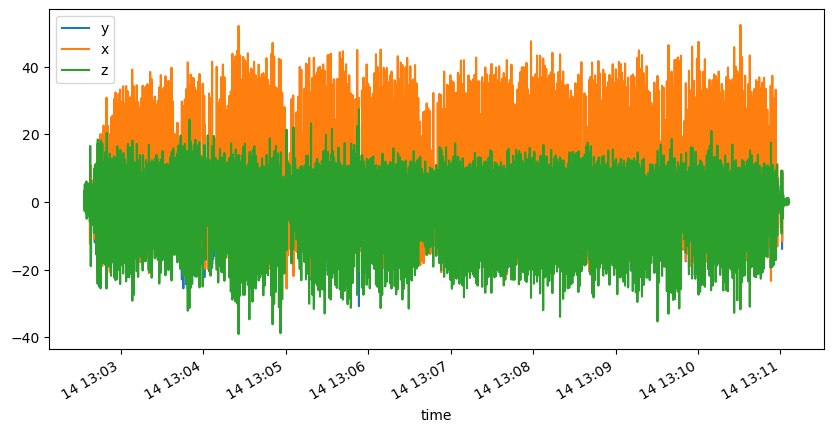

In [63]:
df_walk_1_acc.plot(figsize=(10,5))

<Axes: xlabel='time'>

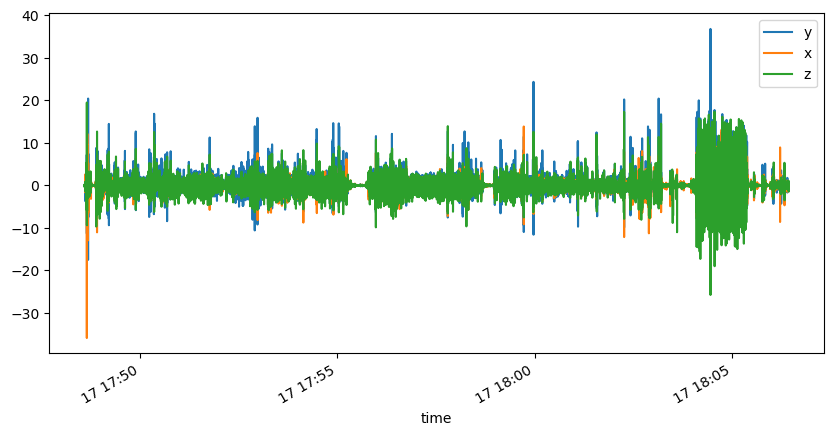

In [64]:
df_bike_1_acc.plot(figsize=(10,5))

<Axes: xlabel='time'>

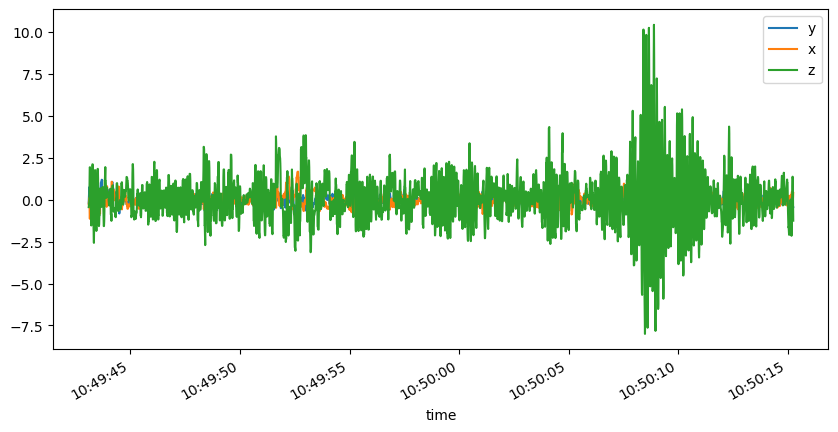

In [71]:
df_bus_1_acc.plot(figsize=(10,5))